In [1]:
# First, we start importing the packages that we will use on this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

#Adjusting the size of the plots that will be created
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#Creating a data frame with the data (https://www.kaggle.com/danielgrijalvas/movies)
df = pd.read_csv('movies.csv')

In [2]:
# Checking the data
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Description of the variables

Variable | Description|
-----|-----| 
name|name of the movie|
rating|rating of the movie (R, PG-13, etc.)|
genre|main genre of the film|
year|year of release|
released|release date|
score|IMDb user rating|
votes|count of IMDb user votes|
director|the director of the film|
writer|the writer of the film|
star|the main actor/actress of the film|
country|country of origin|
budget|the budget of a movie. Some movies don't have this, so it appears as 0|
gross|revenue of the film|
company|the production company|
runtime|duration of the film|


In [3]:
#Checking if there is any missing data

for col in df.columns:
    missing_rate = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_rate*100)))


name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
#Removing missing values 

df.dropna(inplace=True)

In [5]:
#Checking the data type of the columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [6]:
#Changing data type of two columns from float to int

df = df.astype({'gross':'int64', 'budget':'int64'})


<AxesSubplot:>

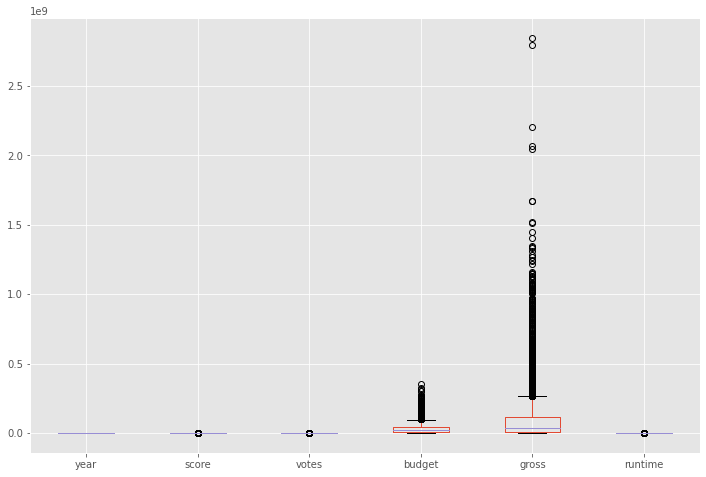

In [7]:
#Checking if there are outliers

df.boxplot()

In [8]:
#Removing duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [9]:
#Ordering the data set according to variable gross(revenue)

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

Text(0.5, 1.0, 'Gross Revenue vs Budget')

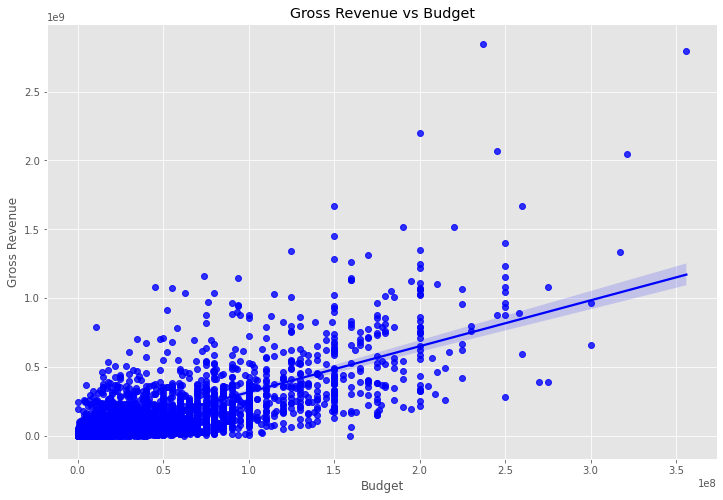

In [10]:
#Comparing gross revenue and budget

fig1 = sns.regplot(x='budget', y='gross', data=df, color='b', x_jitter=0.8)
fig1.set(xlabel='Budget', ylabel='Gross Revenue')
fig1.set_title('Gross Revenue vs Budget')


Text(0.5, 1.0, 'Gross Revenue vs Score')

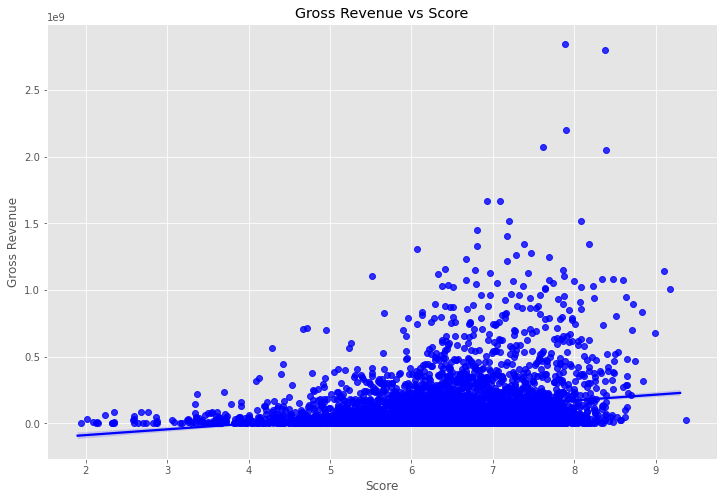

In [11]:
#Comparing gross revenue and score
fig2 = sns.regplot(x='score', y='gross', data=df, color='b', x_jitter=0.2)
fig2.set(xlabel='Score', ylabel='Gross Revenue')
fig2.set_title('Gross Revenue vs Score')


In [12]:
#Pearson correlation

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

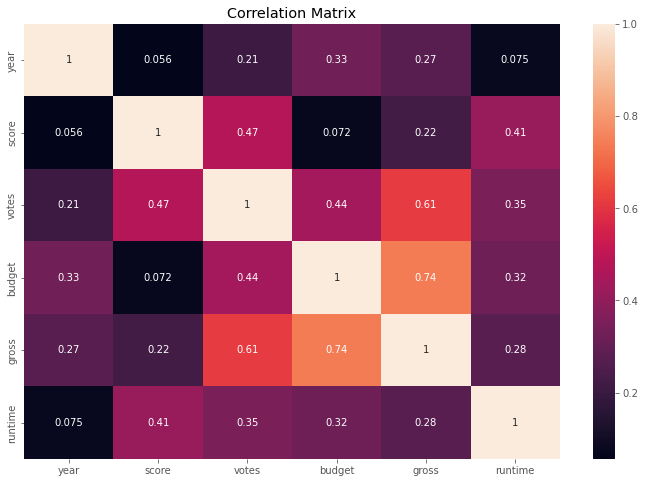

In [13]:
#Illustrating the correlations between the variables

correlation_matrix = df.corr(method='pearson')
fig3 = sns.heatmap(correlation_matrix, annot=True)
fig3.set_title('Correlation Matrix')